In [101]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.datasets import fetch_mldata
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

%matplotlib inline
pd.set_option('display.max_columns', None)
cmaps = OrderedDict()

In [102]:
plt.style.use('seaborn-dark-palette')

In [103]:
df = pd.read_csv(r'C:\Users\aaron\prem_league_analytics\data\clean_prem_players.csv')

In [104]:
df['player_position'] = df['player_positions'].str.split(',').str[0]
df['player_position'].unique()

array(['CB', '0', 'RB', 'CAM', 'LM', 'RW', 'RM', 'LW', 'LB', 'CM', 'CF',
       'ST', 'CDM', 'LWB', 'RWB', 'GK'], dtype=object)

In [105]:
df['player_position'] = df['player_position'].replace(to_replace =['RB', 'LB','LWB','RWB'], value='OB')
df['player_position'] = df['player_position'].replace(to_replace =['CAM','CDM', 'CM'], value='CM')
df['player_position'] = df['player_position'].replace(to_replace =['LM', 'RM', 'RW', 'LW'], value='W')
df['player_position'] = df['player_position'].replace(to_replace =['CF', 'ST'], value='ST')
df['player_position'] = df['player_position'].replace(to_replace =['GK'], value='GK')
df['player_position'] = df['player_position'].astype('str')

In [106]:
df['player_position'].unique()

array(['CB', '0', 'OB', 'CM', 'W', 'ST', 'GK'], dtype=object)

In [107]:
df['player_position_value'] = df['player_position']

In [108]:
df['player_position_value'] = df['player_position_value'].replace(to_replace =['GK'], value= 1)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['CB'], value= 2)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['OB'], value= 3)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['CM'], value= 4)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['W'], value= 5)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['ST'], value= 6)

In [109]:
features = ['attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'overall','goals', 'assists']

In [110]:
df[features] = df[features].apply(pd.to_numeric)

In [111]:
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['player_position_value']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

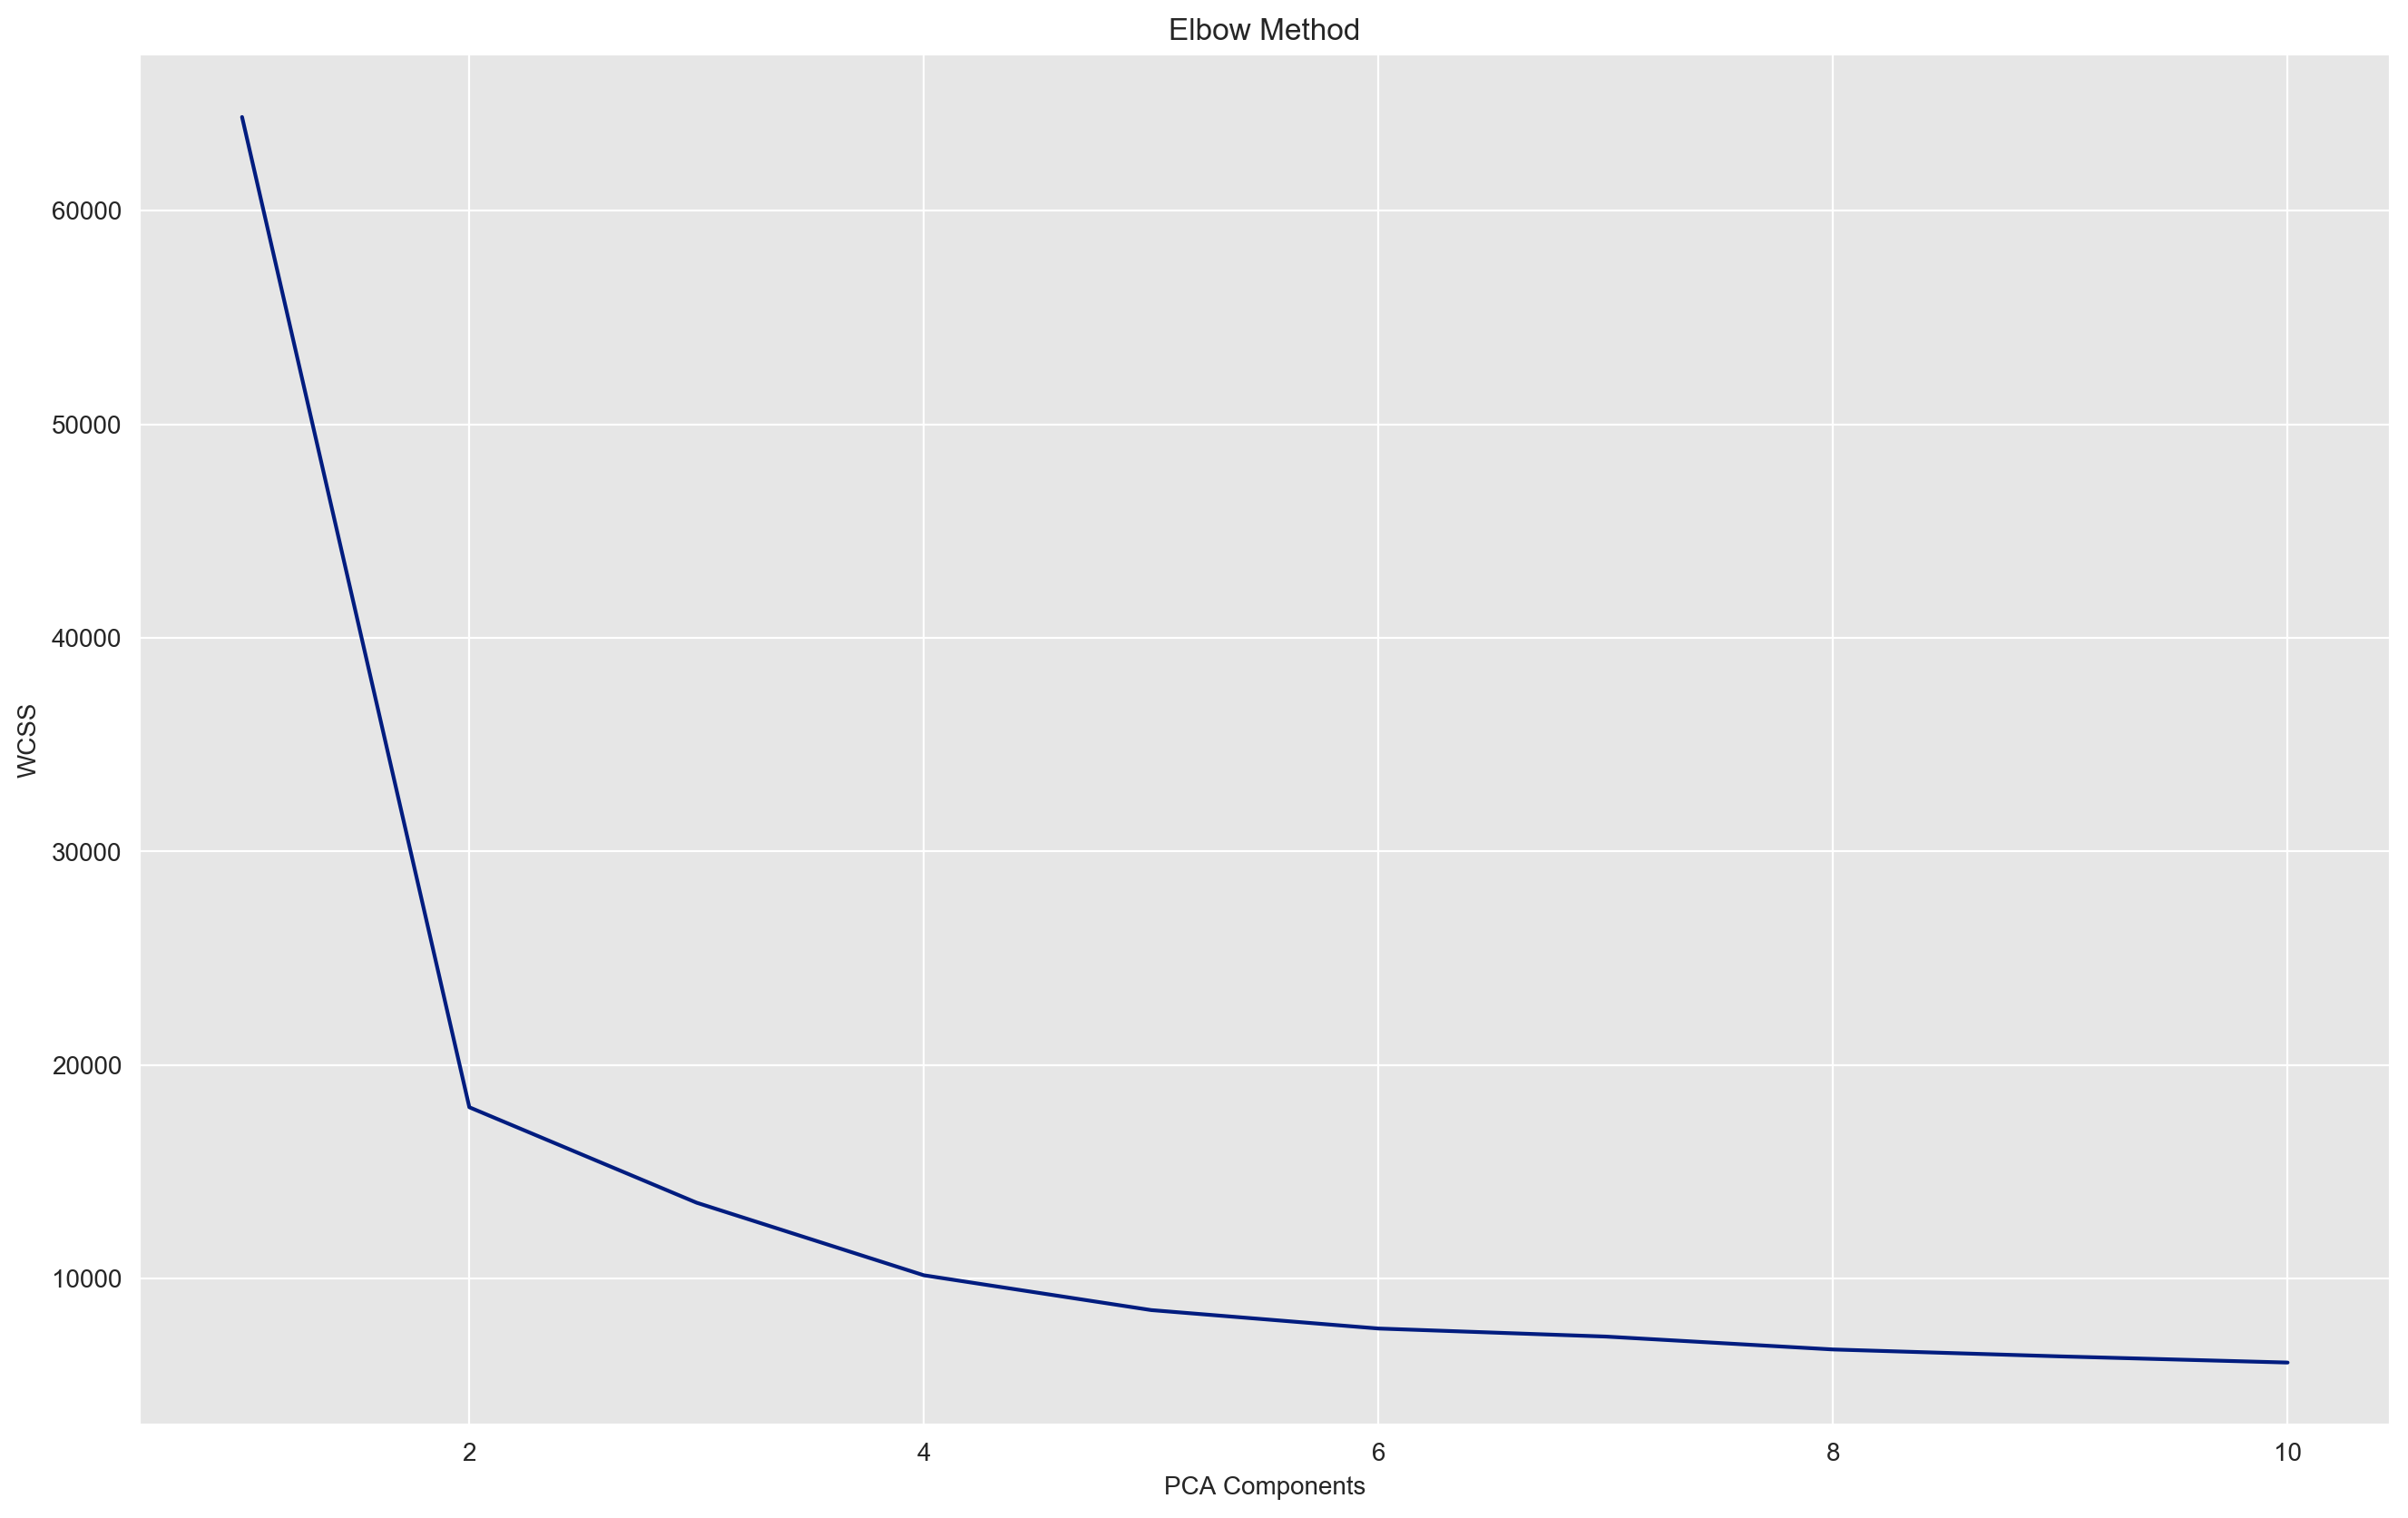

In [112]:
wcss = []
plt.figure(figsize=(16, 10), dpi=200)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('PCA Components')
plt.ylabel('WCSS')
plt.show()

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-3.270765,-2.164194
1,-3.517926,-1.864947
2,-3.411034,-1.868319
3,-3.663187,-2.139183
4,-3.400502,-2.167475


In [114]:
pca.explained_variance_ratio_

array([0.80055365, 0.08004547])

In [115]:
finalDf = pd.concat([principalDf, df[['player_position']]], axis = 1)
finalDf = finalDf[finalDf.player_position != '0']
#finalDf = finalDf[finalDf['principal component 1'] < 6]

In [116]:
print('pca1 min = ' + str(finalDf['principal component 1'].min()))
print('pca1 max = ' + str(finalDf['principal component 1'].max()))
print('pca2 min = ' + str(finalDf['principal component 2'].min()))
print('pca2 max = ' + str(finalDf['principal component 2'].max()))

pca1 min = -6.036796704320866
pca1 max = 4.3873278801903455
pca2 min = -3.3032582792290035
pca2 max = 6.209185771286362


In [117]:
finalDf = pd.concat([finalDf, df[['player_position_value']]], axis = 1)
finalDf = pd.concat([finalDf, df[['name']]], axis = 1)
finalDf = pd.concat([finalDf, df[['year']]], axis = 1)

In [118]:
finalDf = finalDf.dropna()
finalDf = finalDf.drop_duplicates(subset='name', keep="last")
finalDf = finalDf.loc[finalDf['name'] != '0']
finalDf

,principal component 1,principal component 2,player_position,player_position_value,name,year
4,-3.400502,-2.167475,CB,2,Nicolás Otamendi,19/20
7,-5.297147,-0.768641,OB,3,João Cancelo,19/20
14,-5.991596,1.948451,CM,4,Kevin De Bruyne,19/20
19,-4.558553,2.282163,W,5,Raheem Sterling,19/20
24,-4.951975,1.605821,W,5,Leroy Sané,19/20
29,-4.718941,-1.944700,CB,2,Virgil van Dijk,19/20
34,-2.573296,-2.553596,CB,2,Joe Gomez,19/20
39,-4.922040,-0.452279,OB,3,Trent Alexander-Arnold,19/20
43,-4.153759,-1.258532,OB,3,Nathaniel Clyne,18/19
48,-5.507154,-0.431489,CM,4,Georginio Wijnaldum,19/20


In [119]:
finalDf.head()

,principal component 1,principal component 2,player_position,player_position_value,name,year
4,-3.400502,-2.167475,CB,2,Nicolás Otamendi,19/20
7,-5.297147,-0.768641,OB,3,João Cancelo,19/20
14,-5.991596,1.948451,CM,4,Kevin De Bruyne,19/20
19,-4.558553,2.282163,W,5,Raheem Sterling,19/20
24,-4.951975,1.605821,W,5,Leroy Sané,19/20


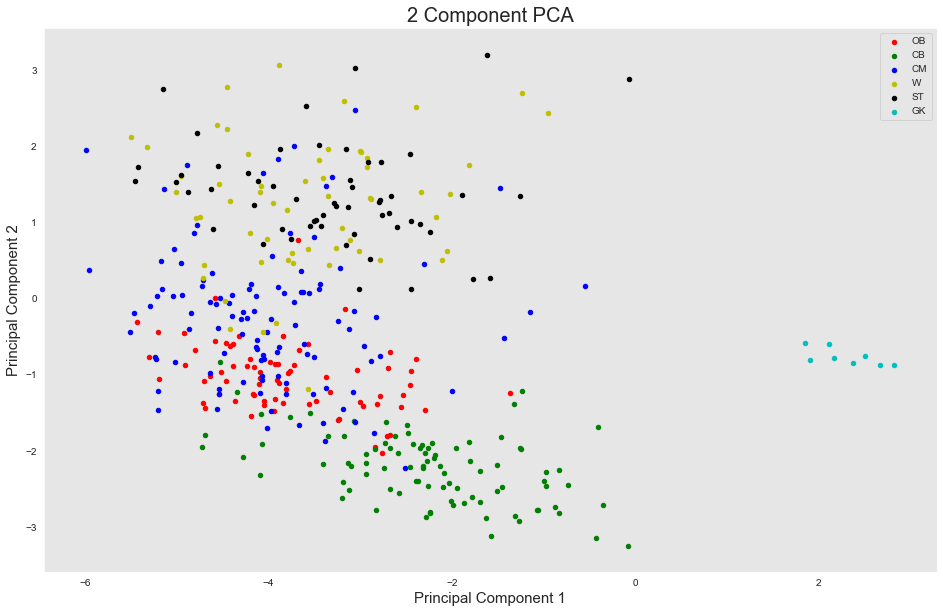

In [120]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['OB', 'CB', 'CM', 'W', 'ST', 'GK']
colors = ['r', 'g', 'b', 'y','k','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['player_position'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

In [121]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

#kmeans = KMeans(n_clusters=7)

clusters = km.fit(principalDf)
y_km = km.fit_predict(principalDf)

In [122]:
finalDf['cluster'] = pd.Series(clusters.labels_, index=None)
finalDf.head()

,principal component 1,principal component 2,player_position,player_position_value,name,year,cluster
4,-3.400502,-2.167475,CB,2,Nicolás Otamendi,19/20,2
7,-5.297147,-0.768641,OB,3,João Cancelo,19/20,0
14,-5.991596,1.948451,CM,4,Kevin De Bruyne,19/20,3
19,-4.558553,2.282163,W,5,Raheem Sterling,19/20,3
24,-4.951975,1.605821,W,5,Leroy Sané,19/20,3


In [123]:
finalDf['cluster'].value_counts()

0    174
2    108
4     75
3     34
1      8
Name: cluster, dtype: int64

In [124]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

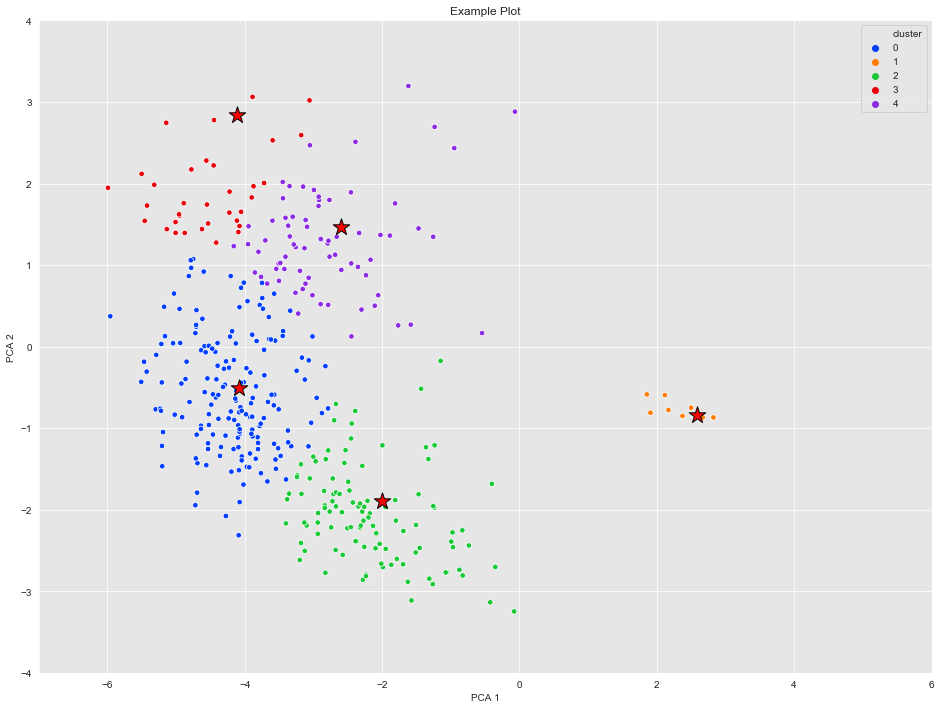

In [144]:
palette = sns.color_palette("bright", 5)  #Choosing color
plt.figure(figsize=(16, 12))

g = sns.scatterplot(x="principal component 1", y="principal component 2", palette=palette, hue = 'cluster', s=30, data=finalDf)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.title('Example Plot')
# Set x-axis label
plt.xlabel('PCA 1')
# Set y-axis label
plt.ylabel('PCA 2')

plt.xlim(-7, 6)
plt.ylim(-4, 4)
plt.show()

In [126]:
label = finalDf['cluster']

In [127]:
features=list(zip(finalDf['principal component 1'],finalDf['principal component 2']))

In [128]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[2,0]]) #GK input (should output [1])
print(predicted)

[1]


In [129]:
df_player_selection = finalDf.loc[finalDf['name'] == 'Ederson']
df_player_selection

,principal component 1,principal component 2,player_position,player_position_value,name,year,cluster
1906,2.117363,-0.593989,GK,1,Ederson,17/18,1


In [130]:
df_player_pca = df_player_selection[['principal component 1', 'principal component 2']].to_numpy()
df_player_pca

array([[ 2.11736349, -0.5939887 ]])

In [131]:
predicted= model.predict(df_player_pca) #GK input (should output [1])
print(predicted)

[1]


In [132]:
#Importing KDTree

from sklearn.neighbors import KDTree

kdt = KDTree(finalDf[['principal component 1', 'principal component 2']])

In [133]:
#Using KDTree to find 3 articles similar to that of Ederson

dist, idx = kdt.query(finalDf[['principal component 1', 'principal component 2']][finalDf['name']=='Ederson'], k=5)

In [134]:
print(finalDf['name'].iloc[idx[0,1]])
print(finalDf['name'].iloc[idx[0,2]])
print(finalDf['name'].iloc[idx[0,3]])
print(finalDf['name'].iloc[idx[0,4]])

Alisson
Ryan Fredericks
Rui Patrício
Adrián


In [141]:
#Importing KDTree

from sklearn.neighbors import KDTree

kdt = KDTree(finalDf[['principal component 1', 'principal component 2']])

#Using KDTree to find 5 articles similar to that of input

dist, idx = kdt.query(finalDf[['principal component 1', 'principal component 2']][finalDf['name']=='Leroy Sané'], k=5)

nn_df = pd.DataFrame()

nn_df = nn_df.append(finalDf[['name', 'player_position', 'principal component 1', 'principal component 2', 'cluster']].iloc[idx[0,1]])
nn_df = nn_df.append(finalDf[['name', 'player_position', 'principal component 1', 'principal component 2', 'cluster']].iloc[idx[0,2]])
nn_df = nn_df.append(finalDf[['name', 'player_position', 'principal component 1', 'principal component 2', 'cluster']].iloc[idx[0,3]])
nn_df = nn_df.append(finalDf[['name', 'player_position', 'principal component 1', 'principal component 2', 'cluster']].iloc[idx[0,4]])
nn_df['cluster'] = nn_df['cluster'].astype(str)
nn_df['cluster'] = nn_df['cluster'].str.split('.').str[0]
nn_df

,cluster,name,player_position,principal component 1,principal component 2
98,3,Marcus Rashford,ST,-4.956602,1.623060
886,3,Alexandre Lacazette,ST,-5.006974,1.527708
1281,3,David Silva,CM,-4.887999,1.759096
818,3,Bernardo Silva,W,-5.006415,1.395515


In [167]:
nn_mean = nn_df[['principal component 1', 'principal component 2']].mean()
print(nn_mean[0])
print(nn_mean[1])

-4.964497294974872
1.5763449734679553


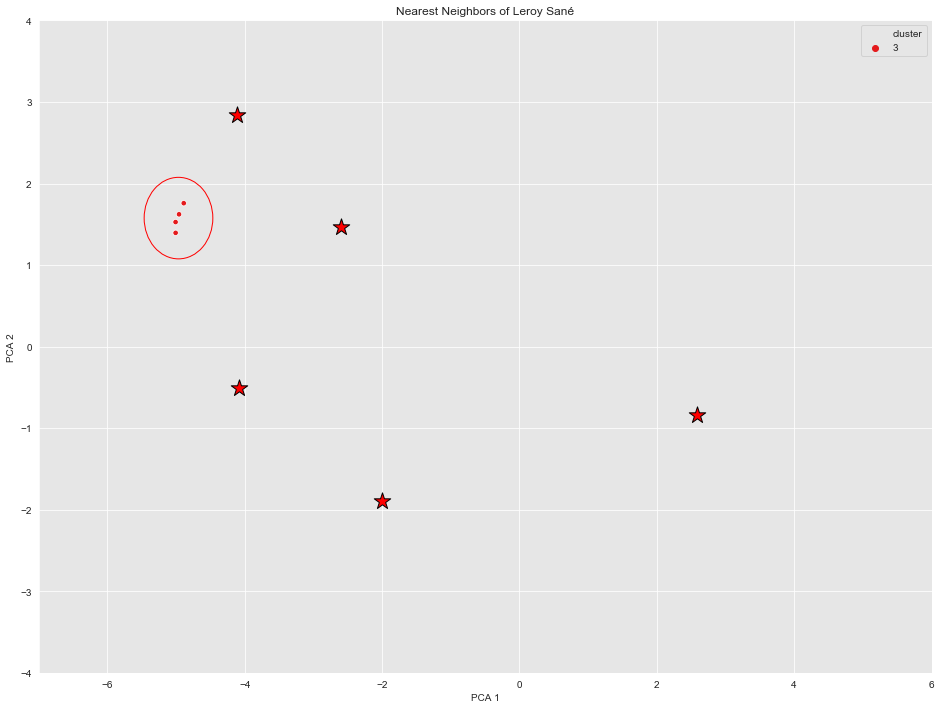

In [184]:
palette = sns.color_palette("Set1", 1)  #Choosing color
plt.figure(figsize=(16, 12))

circle1 = plt.Circle((nn_mean[0], nn_mean[1]), 0.5, color='r', fill=False)

ax = sns.scatterplot(x="principal component 1", y="principal component 2", palette=palette, hue = 'cluster', s=30, data=nn_df)
ax.add_artist(circle1)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)


plt.title('Nearest Neighbors of ' + finalDf['name'].iloc[idx[0,0]])

# Set x-axis label
plt.xlabel('PCA 1')
# Set y-axis label
plt.ylabel('PCA 2')

plt.xlim(-7, 6)
plt.ylim(-4, 4)
plt.show()